<a href="https://colab.research.google.com/github/Kamaliarivazhagan/Chutki/blob/main/syed'steamTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score

In [ ]:
#Applying styles to notebook

plt.style.use('fivethirtyeight')

In [ ]:
#Reading the dataset

df =pd.read_csv(r"/content/students_placement_data.csv")
df.head()

,Roll No,Gender,Section,SSC Percentage,inter_Diploma_percentage,B.Tech_percentage,Backlogs,registered_for_ Placement_Training,placement status
0,1,M,A,87.3,65.3,40.00,18,NO,Not placed
1,2,F,A,89.0,92.4,71.45,0,yes,Placed
2,3,F,A,67.0,68.0,45.26,13,yes,Not placed
3,4,M,A,71.0,70.4,36.47,17,yes,Not placed
4,5,M,A,NaN,65.5,42.52,17,yes,Not placed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Checking the datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Roll No                             117 non-null    int64  
 1   Gender                              117 non-null    object 
 2   Section                             117 non-null    object 
 3   SSC Percentage                      116 non-null    float64
 4   inter_Diploma_percentage            117 non-null    float64
 5   B.Tech_percentage                   117 non-null    float64
 6   Backlogs                            117 non-null    int64  
 7   registered_for_ Placement_Training  117 non-null    object 
 8   placement status                    117 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 8.4+ KB


In [ ]:
#checking the null values


df.isnull().sum()

Roll No                               0
Gender                                0
Section                               0
SSC Percentage                        1
inter_Diploma_percentage              0
B.Tech_percentage                     0
Backlogs                              0
registered_for_ Placement_Training    0
placement status                      0
dtype: int64

In [ ]:
#find mean value

df['SSC Percentage'].mean()

80.47456896551722

In [ ]:
#Replacing null values


df['SSC Percentage']=df['SSC Percentage'].fillna(df['SSC Percentage'].mean())

In [ ]:
df

,Roll No,Gender,Section,SSC Percentage,inter_Diploma_percentage,B.Tech_percentage,Backlogs,registered_for_ Placement_Training,placement status
0,1,M,A,87.300000,65.30,40.00,18,NO,Not placed
1,2,F,A,89.000000,92.40,71.45,0,yes,Placed
2,3,F,A,67.000000,68.00,45.26,13,yes,Not placed
3,4,M,A,71.000000,70.40,36.47,17,yes,Not placed
4,5,M,A,80.474569,65.50,42.52,17,yes,Not placed
...,...,...,...,...,...,...,...,...,...
112,113,M,B,81.100000,78.60,35.84,16,NO,Not placed
113,114,M,B,81.300000,85.12,68.50,0,NO,Not placed
114,115,M,B,83.500000,89.90,76.30,0,NO,Not placed
115,116,M,B,85.500000,90.63,74.50,0,NO,Not placed


In [ ]:
df.isnull().sum()

Roll No                               0
Gender                                0
Section                               0
SSC Percentage                        0
inter_Diploma_percentage              0
B.Tech_percentage                     0
Backlogs                              0
registered_for_ Placement_Training    0
placement status                      0
dtype: int64

<ipython-input-88-0e6d535ac4df>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['SSC Percentage']))


<Axes: xlabel='SSC Percentage', ylabel='Density'>

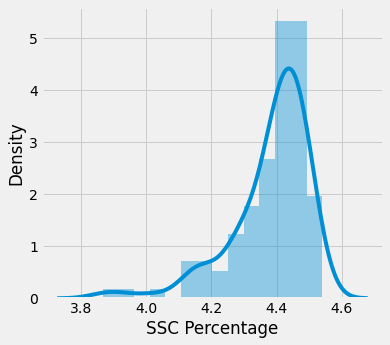

In [ ]:
#Handling Outliers

from scipy import stats

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(np.log(df['SSC Percentage']))

In [ ]:
#Handling Categorical values

df['Gender']=[0 if x=='Male' else 1 if x=='Female' else 2 for x in df['Gender']]

In [ ]:
df['Section'] = df['Section'].replace({'A':1, 'B':2})

In [ ]:
df['registered_for_ Placement_Training'] = df['registered_for_ Placement_Training'].replace({'yes':2, 'NO':0})

In [ ]:
df['placement status'] = df['placement status'].replace({'Not placed':0, 'Placed':1})

In [ ]:
df

,Roll No,Gender,Section,SSC Percentage,inter_Diploma_percentage,B.Tech_percentage,Backlogs,registered_for_ Placement_Training,placement status
0,1,2,1,87.300000,65.30,40.00,18,0,0
1,2,2,1,89.000000,92.40,71.45,0,2,1
2,3,2,1,67.000000,68.00,45.26,13,2,0
3,4,2,1,71.000000,70.40,36.47,17,2,0
4,5,2,1,80.474569,65.50,42.52,17,2,0
...,...,...,...,...,...,...,...,...,...
112,113,2,2,81.100000,78.60,35.84,16,0,0
113,114,2,2,81.300000,85.12,68.50,0,0,0
114,115,2,2,83.500000,89.90,76.30,0,0,0
115,116,2,2,85.500000,90.63,74.50,0,0,0
